In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install xgboost
!pip install imblearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import joblib
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [1]:
# KFold() Cross Validation for Model Training
kf = KFold(n_splits=3, shuffle=True, random_state=42)

NameError: name 'KFold' is not defined

In [2]:
# Reading the Dataset and seeing the column names

dataset = pd.read_csv('/content/drive/MyDrive/creditcard/creditcard.csv')

dataset.columns

NameError: name 'pd' is not defined

In [ ]:
dataset.shape

(284807, 31)

In [ ]:
# Goal of this tab is to slice the dataset into 2 - X with all the features and y with the target 'Class'
X = dataset.drop(columns = 'Class')
y = dataset['Class']

X, y

(            Time         V1         V2        V3        V4        V5  \
 0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
 1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
 2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
 3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
 4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
 ...          ...        ...        ...       ...       ...       ...   
 284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
 284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
 284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
 284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
 284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   
 
               V6        V7        V8        V9  ...       V20       V21  \
 0       0.462388  0.239599  0.098698  0.36378

In [ ]:
# Defining the preprocessing pipeline
oversample = SMOTE(sampling_strategy = 0.1)  # Oversample minority class to 10% of majority class
undersample = RandomUnderSampler(sampling_strategy=1)  # Undersample majority class to the same number as the minority class

pipeline = Pipeline(steps=[('o', oversample),('u', undersample)])

# Applying the pipeline to the training data
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Verifying the class distribution after resampling
print(f"Class distribution before resampling: {pd.Series(y).value_counts()}")
print(f"Class distribution after resampling: {pd.Series(y_resampled).value_counts()}")
print(X_resampled.shape)
print(y_resampled.shape)

Class distribution before resampling: Class
0    284315
1       492
Name: count, dtype: int64
Class distribution after resampling: Class
0    28431
1    28431
Name: count, dtype: int64
(56862, 30)
(56862,)


In [ ]:
# Applying Standard Scaler to normalise the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

X_resampled.shape

(56862, 30)

In [ ]:
# Split the data into training and testing sets where training = 80% and test = 20%
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, shuffle = True, random_state=42)

#### SVM Without GridSearchCv

In [ ]:
# Initializing the plain SVM model
svm_model = SVC(kernel='linear', random_state=42)

In [ ]:
# Model Training
svm_model.fit(X_train_resampled, y_train_resampled)

# Model Predictions
y_pred = svm_model.predict(X_test_resampled)

In [ ]:
# Model Evaluation for Test
accuracy = accuracy_score(y_test_resampled, y_pred)
conf_matrix = confusion_matrix(y_test_resampled, y_pred)
class_report = classification_report(y_test_resampled, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9452211377824673
Confusion Matrix:
[[5515  138]
 [ 485 5235]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5653
           1       0.97      0.92      0.94      5720

    accuracy                           0.95     11373
   macro avg       0.95      0.95      0.95     11373
weighted avg       0.95      0.95      0.95     11373



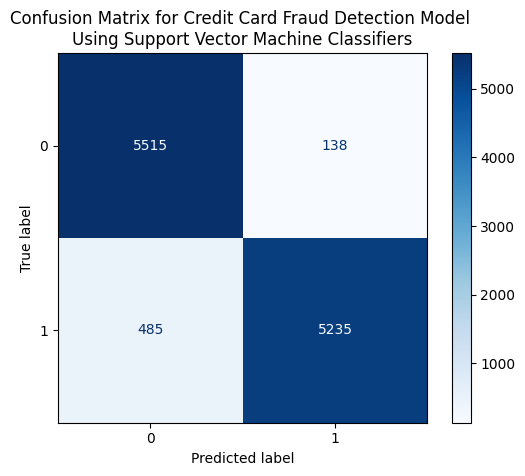

In [ ]:
# Calculateion of the confusion matrix
conf_matrix = confusion_matrix(y_test_resampled, y_pred)

# Plotting the confusion matrix using ConfusionMatrixDisplay()
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_resampled))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Credit Card Fraud Detection Model \nUsing Support Vector Machine Classifiers')
plt.show()

In [ ]:
# Computing the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred)

# Computing the AUC score
auc_score = roc_auc_score(y_test_resampled, y_pred)
print(f'AUC Score: {auc_score}')

AUC Score: 0.9453989867376565


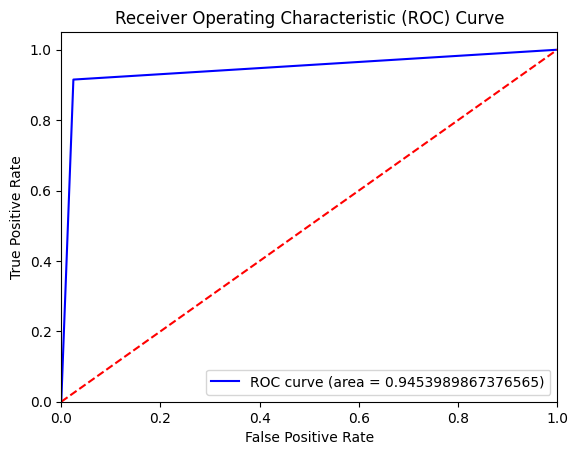

In [ ]:

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### SVM With GridSearchCv

In [ ]:
# param_grid for GridSearchCv
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

In [ ]:

svm = SVC(random_state=42)

In [ ]:
# Initializing GridSearchCV for SVM
grid = GridSearchCV(svm, param_grid, refit=True, verbose=0, cv=3)

# Fitting the GridSearchCV to the data
grid.fit(X_train_resampled, y_train_resampled)

# Printing the best parameters and best estimator
print("Best Parameters: ", grid.best_params_)
print("Best Estimator: ", grid.best_estimator_)

svm_model = grid.best_estimator_

Best Parameters:  {'C': 100, 'gamma': 0.1}
Best Estimator:  SVC(C=100, gamma=0.1, random_state=42)


In [ ]:
# Model Predictions
y_pred = grid.predict(X_test_resampled)

# Evaluation using Report
print("Classification Report: ")
print(classification_report(y_test_resampled, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5653
           1       1.00      1.00      1.00      5720

    accuracy                           1.00     11373
   macro avg       1.00      1.00      1.00     11373
weighted avg       1.00      1.00      1.00     11373



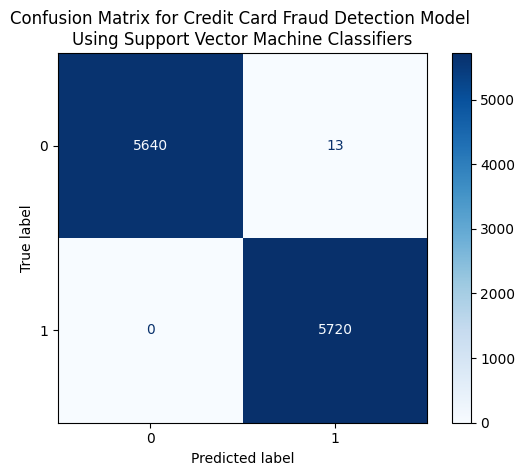

In [ ]:
# COnfusion Matrix
conf_matrix = confusion_matrix(y_test_resampled, y_pred)

# Display of the conf_matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_resampled))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Credit Card Fraud Detection Model \nUsing Support Vector Machine Classifiers')
plt.show()

In [ ]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred)

# AUC score
auc_score = roc_auc_score(y_test_resampled, y_pred)
print(f'AUC Score: {auc_score}')

AUC Score: 0.9988501680523616


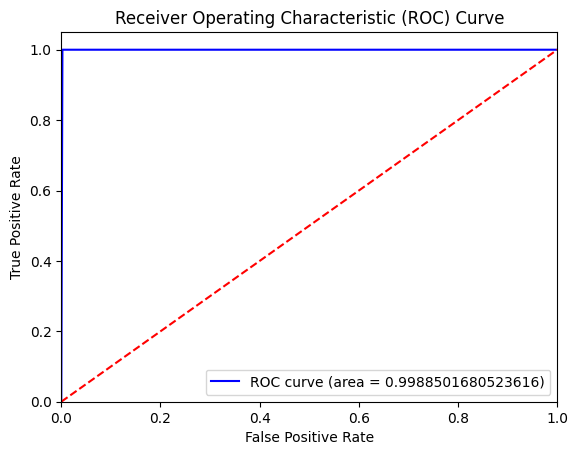

In [ ]:

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### RandomForest Without GridSearchCV

In [ ]:
# Random Forest Without gridsearch
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# test predictions
y_pred = rf_model.predict(X_test_resampled)

# test classification report
print("Classification Report: ")
print(classification_report(y_test_resampled, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5653
           1       1.00      1.00      1.00      5720

    accuracy                           1.00     11373
   macro avg       1.00      1.00      1.00     11373
weighted avg       1.00      1.00      1.00     11373



#### Random Foreswt Using GridSearchCV

In [ ]:
# param_grid for for random forest gridSearchCv
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Setting up the grid to find the best parameters
grid = GridSearchCV(rf, param_grid, refit=True, verbose=0, cv=kf)

# Fitting the model
grid.fit(X_train_resampled, y_train_resampled)

# Finding out the best model and parameters of the model
print("Best Parameters: ", grid.best_params_)
print("Best Estimator: ", grid.best_estimator_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Best Estimator:  RandomForestClassifier(criterion='entropy', random_state=42)


In [ ]:
# Model Predictions
y_pred = grid.predict(X_test_resampled)

# Classififcation report
print("Classification Report: ")
print(classification_report(y_test_resampled, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5653
           1       1.00      1.00      1.00      5720

    accuracy                           1.00     11373
   macro avg       1.00      1.00      1.00     11373
weighted avg       1.00      1.00      1.00     11373



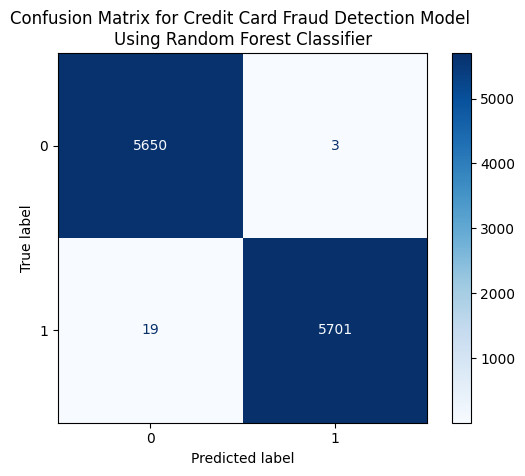

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_test_resampled, y_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_resampled))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Credit Card Fraud Detection Model \nUsing Random Forest Classifier')
plt.show()

In [ ]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred)

# Compute the AUC score
auc_score = roc_auc_score(y_test_resampled, y_pred)
print(f'AUC Score: {auc_score}')

AUC Score: 0.9980738150050904


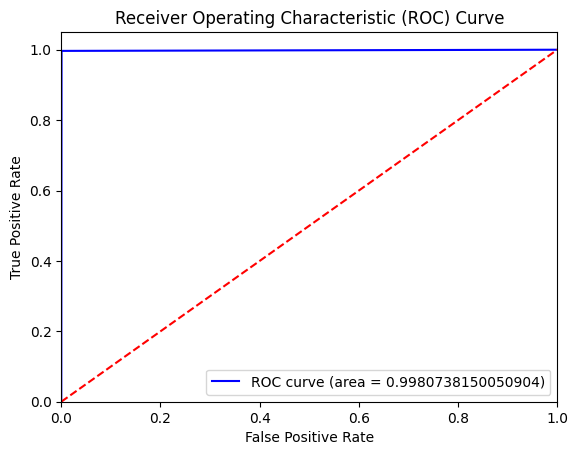

In [ ]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### XGBoost

In [ ]:
# Implementing the XGBoost Model
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test_resampled, label=y_test_resampled)

# Setting some predefined parameters
params = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'seed':42
}

# Train the model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

Accuracy: 0.996834608282775
Confusion Matrix:
[[5635   18]
 [  18 5702]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5653
           1       1.00      1.00      1.00      5720

    accuracy                           1.00     11373
   macro avg       1.00      1.00      1.00     11373
weighted avg       1.00      1.00      1.00     11373



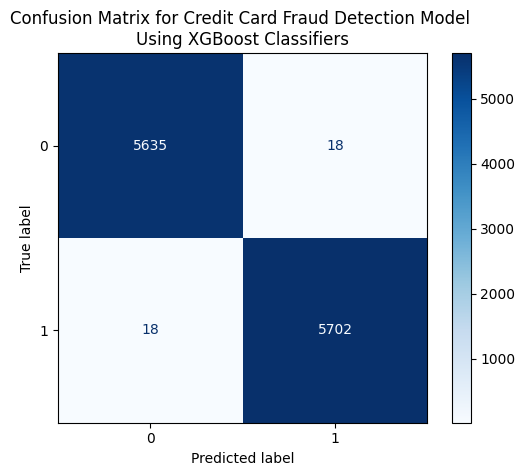

In [ ]:
# Model Predictions
preds = bst.predict(dtest)
y_pred = [round(value) for value in preds]

# Model Evaluation
accuracy = accuracy_score(y_test_resampled, y_pred)
conf_matrix = confusion_matrix(y_test_resampled, y_pred)
class_report = classification_report(y_test_resampled, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_resampled, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_resampled))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Credit Card Fraud Detection Model \nUsing XGBoost Classifiers')
plt.show()

In [ ]:
# Saving the models using joblib
joblib.dump(bst, 'xgb_model.bin')

['xgb_model.bin']

In [ ]:
print(xgb.__version__)

2.1.1


In [ ]:
dt = DecisionTreeClassifier()

params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(dt, params, cv=kf, verbose=0)

grid.fit(X_train_resampled, y_train_resampled)

print("Best Parameters: ", grid.best_params_)
print("Best Estimator: ", grid.best_estimator_)

dt_model = grid.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=15)


In [ ]:
# Make predictions using the best model
y_pred = grid.predict(X_test_resampled)

# Evaluate the model
print("Classification Report: ")
print(classification_report(y_test_resampled, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5653
           1       0.98      0.99      0.99      5720

    accuracy                           0.99     11373
   macro avg       0.99      0.99      0.99     11373
weighted avg       0.99      0.99      0.99     11373



In [ ]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred)

# Compute the AUC score
auc_score = roc_auc_score(y_test_resampled, y_pred)
print(f'AUC Score: {auc_score}')

AUC Score: 0.9887179466562095


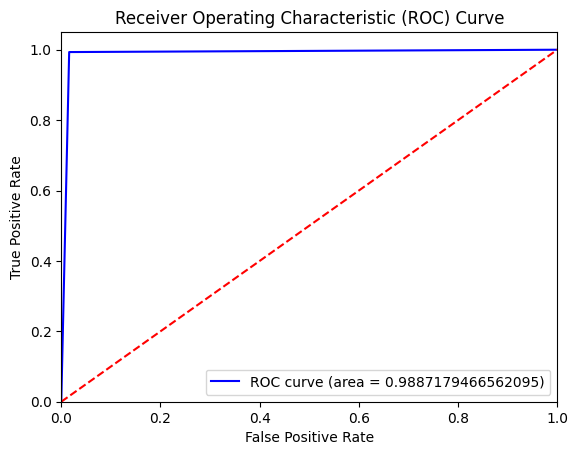

In [ ]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

params = {
    'n_neighbors': range(1, 11)
}

grid = GridSearchCV(knn, params, cv=kf, verbose=0)

grid.fit(X_train_resampled, y_train_resampled)

knn_model = grid.best_estimator_

print("Best Parameters: ", grid.best_params_)
print("Best Estimator: ", grid.best_estimator_)

Best Parameters:  {'n_neighbors': 2}
Best Estimator:  KNeighborsClassifier(n_neighbors=2)


In [ ]:
# Make predictions using the best model
y_pred = grid.predict(X_test_resampled)

# Evaluate the model
print("Classification Report: ")
print(classification_report(y_test_resampled, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5653
           1       1.00      1.00      1.00      5720

    accuracy                           1.00     11373
   macro avg       1.00      1.00      1.00     11373
weighted avg       1.00      1.00      1.00     11373



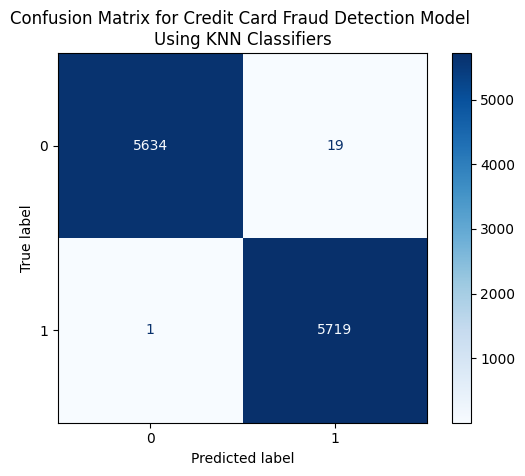

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_resampled, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_resampled))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Credit Card Fraud Detection Model \nUsing KNN Classifiers')
plt.show()

In [ ]:
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

In [ ]:
logistic = LogisticRegression()
params = {
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'C': [0.1, 1, 10, 100],
            'solver': ['lbfgs', 'liblinear', 'saga']
        }
grid = GridSearchCV(logistic, params, cv=3, verbose=0)

grid.fit(X_train_resampled, y_train_resampled)

logistic_model = grid.best_estimator_

print("Best Parameters: ", grid.best_params_)
print("Best Estimator: ", grid.best_estimator_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters:  {'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'}
Best Estimator:  LogisticRegression(C=0.1, penalty='none')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Model Predictions
y_pred = grid.predict(X_test_resampled)

# Model Classification Report
print("Classification Report: ")
print(classification_report(y_test_resampled, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5653
           1       0.99      0.97      0.98      5720

    accuracy                           0.98     11373
   macro avg       0.98      0.98      0.98     11373
weighted avg       0.98      0.98      0.98     11373



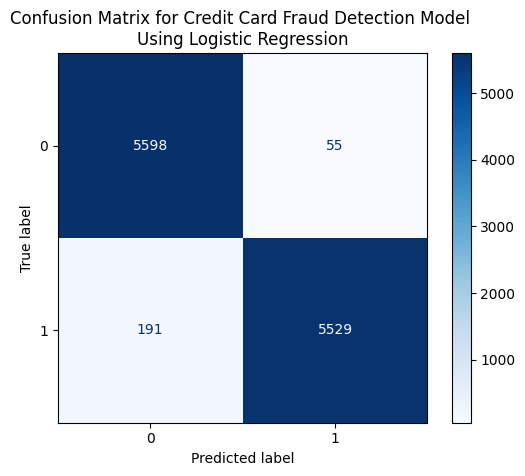

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_resampled, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_resampled))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Credit Card Fraud Detection Model \nUsing Logistic Regression')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred)
auc_score = roc_auc_score(y_test_resampled, y_pred)
print(f'AUC Score: {auc_score}')

AUC Score: 0.9236755308183879


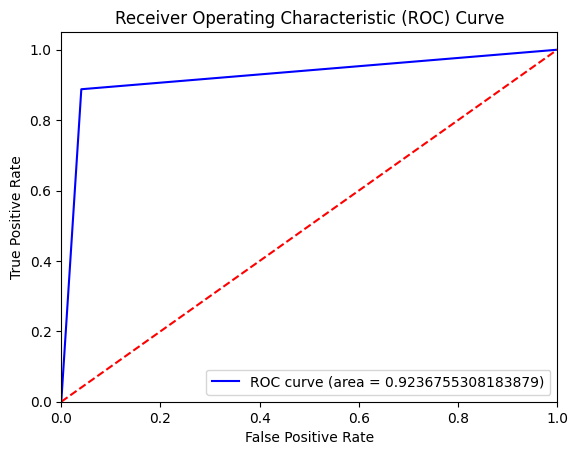

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Trying to see PCA to see if further modifications to be done

X_train_resampled = pd.DataFrame(X_train_resampled)
print(f"Feature importances (coefficients) for Logistic Regression:")
importances = grid.best_estimator_.coef_[0]
for feature, importance in zip(X_train_resampled.columns, importances):
  print(f"{feature}: {importance:.4f}")

Feature importances (coefficients) for Logistic Regression:
0: -0.0499
1: -0.0271
2: 0.0597
3: -0.1791
4: 0.5653
5: 0.0602
6: -0.0037
7: 0.0601
8: -0.1952
9: -0.2146
10: -0.2131
11: 0.2529
12: -0.3267
13: -0.0214
14: -0.6243
15: -0.0985
16: -0.0918
17: 0.0380
18: -0.0113
19: 0.0481
20: -0.1305
21: 0.1158
22: 0.0336
23: 0.0459
24: -0.0553
25: 0.0249
26: -0.0660
27: 0.0959
28: 0.1154
29: 0.0519


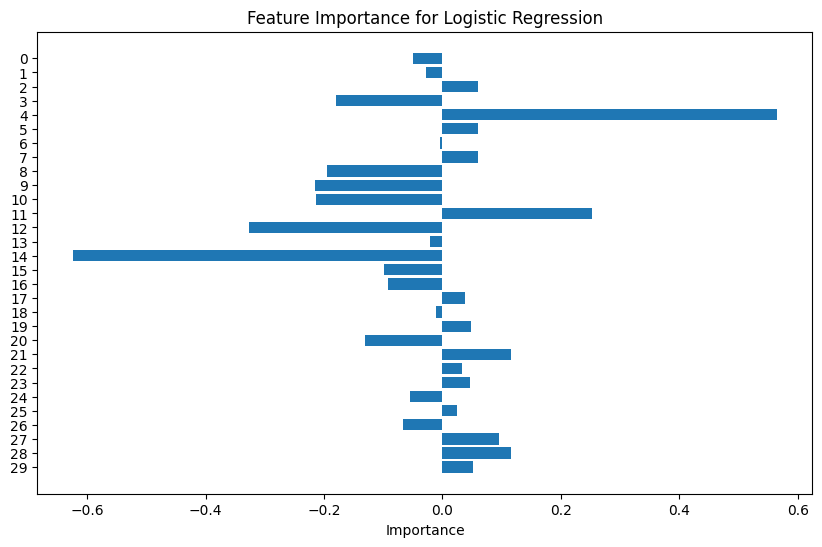

In [ ]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), X_train_resampled.columns)
plt.xlabel("Importance")
plt.title('Feature Importance for Logistic Regression')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [ ]:
import joblib
# joblib.dump(rf_model, 'Random Forest.pkl')

In [ ]:
joblib.dump(grid.best_estimator_, 'Decision Tree.pkl')

['Decision Tree.pkl']

In [ ]:
!pip install streamlit pyngrok pandas scikit-learn joblib

In [ ]:
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [ ]:
joblib.dump(logistic_model, 'logistic_model.pkl')

['logistic_model.pkl']